# Load the dataset (Mumbai local train)

In [32]:
import numpy as np
import pandas as pd
df = pd.read_excel('C:\\Users\\hp\\Desktop\\Mumbai_Local.xlsx')
print(df.head())

          Station Station Code     Line Distance From Previous of the Line  \
0      Churchgate          CCG  Western                               0 KM   
1    Marine Lines          MEL  Western                               1 KM   
2     Charni Road          CYR  Western                               1 KM   
3      Grant Road          GTR  Western                               1 KM   
4  Mumbai Central         MMCT  Western                               1 KM   

  Time taken From Previous of the Line  \
0                                0 min   
1                                3 min   
2                                2 min   
3                                3 min   
4                                2 min   

                                               About  Platforms  Tracks  \
0  The Fort area built by the British had three m...        4.0     4.0   
1  Marine Lines (station code: MEL) is a railway ...        4.0     4.0   
2  Charni Road (formerly Churney Road, station co... 

# Data Cleaning and preparation

In [33]:
print(df.columns) #display the columns of te dataset

Index(['Station', 'Station Code', 'Line', 'Distance From Previous of the Line',
       'Time taken From Previous of the Line', 'About', 'Platforms', 'Tracks',
       'Year of Opening ', 'Nearby attractions'],
      dtype='object')


In [34]:
# Extract relevant columns for network analysis
# Assuming Distance From Previous of the Line is a numerical value indicating distance
stations = df[['Station', 'Station Code', 'Line', 'Distance From Previous of the Line', 'Time taken From Previous of the Line', 'Platforms', 'Tracks', 'Nearby attractions']]

# Create edges between consecutive stations within the same line
edges = [] #connections between stations in the train network
for i in range(1, len(stations)): #This loop starts from the second row (i=1) and goes through each row in the stations DataFrame
    if stations.loc[i, 'Line'] == stations.loc[i-1, 'Line']: #This condition checks if the current station (i) and the previous station (i-1) are on the same line
        edges.append((stations.loc[i-1, 'Station'], stations.loc[i, 'Station'], {'distance': stations.loc[i, 'Distance From Previous of the Line'], 'time': stations.loc[i, 'Time taken From Previous of the Line']}))

# Convert edges to DataFrame
edges_df = pd.DataFrame(edges, columns=['station_from', 'station_to', 'attributes']) #converts the list of edges into a DataFrame for easier manipulation and analysis.

# Display the edges DataFrame
print(edges_df.head())


     station_from      station_to                             attributes
0      Churchgate    Marine Lines  {'distance': '1 KM', 'time': '3 min'}
1    Marine Lines     Charni Road  {'distance': '1 KM', 'time': '2 min'}
2     Charni Road      Grant Road  {'distance': '1 KM', 'time': '3 min'}
3      Grant Road  Mumbai Central  {'distance': '1 KM', 'time': '2 min'}
4  Mumbai Central     Mahalakshmi  {'distance': '1 KM', 'time': '3 min'}


# Create the network graph

In [35]:
import networkx as nx #creating and manipulating complex networks and graphs.

G = nx.Graph() #create an empty graph G using NetworkX.

#Add edges to the graph
for index, row in edges_df.iterrows(): #iterates over each row of the edges_df and iterrows()returns an iterator yielding index and row data for each row.  
    G.add_edge(row['station_from'], row['station_to'], **row['attributes']) 

#Display basic network statistics
print(f"Number of nodes: {G.number_of_nodes()}") #it gives (nodes) no. of stations in graph G
print(f"Number of edges: {G.number_of_edges()}") #it gives (edges) no of connection between stations in the graph G

Number of nodes: 139
Number of edges: 144


# Visualization

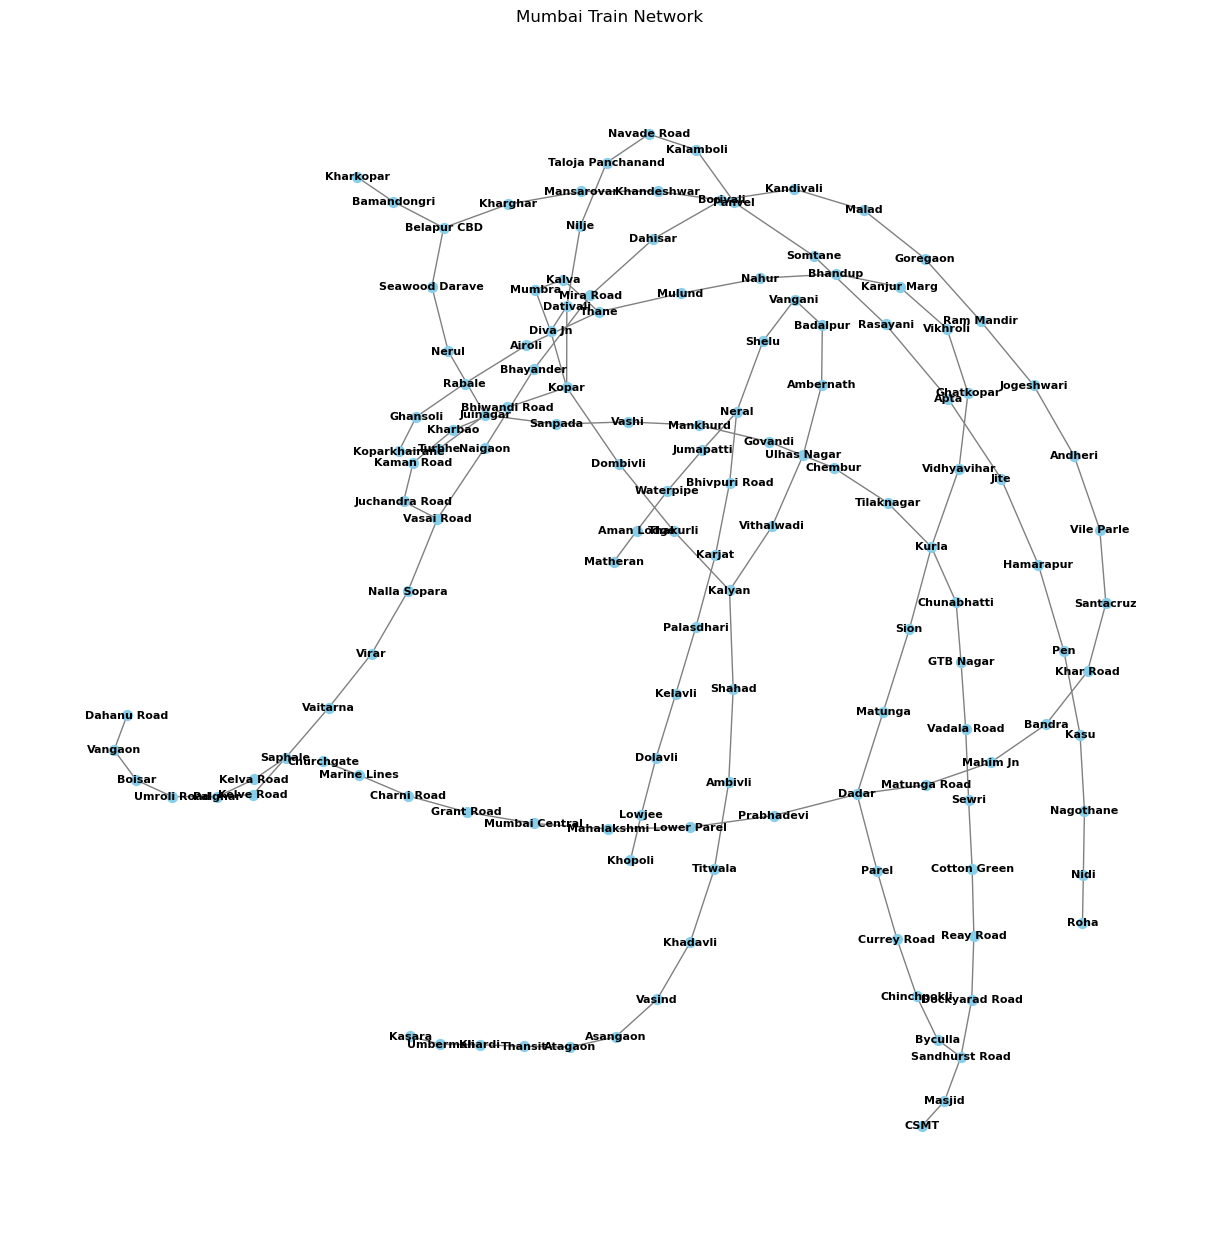

In [36]:
import matplotlib.pyplot as plt

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G) #calculate the positions of the nodes in the graph.
nx.draw(G, pos, with_labels=True, node_size=50, node_color="skyblue", edge_color="gray", font_size=8, font_weight="bold") #nx.draw is used for drawing the graph, G- the graph to be drawn 
plt.title("Mumbai Train Network")
plt.show()

# Shortest path (btw 2 stations)

In [37]:
# Find the shortest path between Churchgate and Dadar
shortest_path = nx.shortest_path(G, source='Churchgate', target='Dadar')
print(f"Shortest path from Churchgate to Dadar: {shortest_path}")


Shortest path from Churchgate to Dadar: ['Churchgate', 'Marine Lines', 'Charni Road', 'Grant Road', 'Mumbai Central', 'Mahalakshmi', 'Lower Parel', 'Prabhadevi', 'Dadar']


# Centrality Measures

In [38]:
#Centrality measures help identify the most important nodes within a graph
# Calculate degree centrality(the no. of connection a node has)
degree_centrality = nx.degree_centrality(G) #Calculates the degree centrality for all nodes in graph G
print(f"Degree Centrality: {degree_centrality}") #Prints the degree centrality values for all nodes

# Calculate betweenness centrality #a node lies on the shortest paths between other nodes.
betweenness_centrality = nx.betweenness_centrality(G) #Calculates the betweenness centrality for all nodes in graph G.
print(f"Betweenness Centrality: {betweenness_centrality}")

# Calculate closeness centrality #how close a node is to all other nodes in the network.
closeness_centrality = nx.closeness_centrality(G) #Calculates the closeness centrality for all nodes in graph G
print(f"Closeness Centrality: {closeness_centrality}")


Degree Centrality: {'Churchgate': 0.007246376811594203, 'Marine Lines': 0.014492753623188406, 'Charni Road': 0.014492753623188406, 'Grant Road': 0.014492753623188406, 'Mumbai Central': 0.014492753623188406, 'Mahalakshmi': 0.014492753623188406, 'Lower Parel': 0.014492753623188406, 'Prabhadevi': 0.014492753623188406, 'Dadar': 0.028985507246376812, 'Matunga Road': 0.014492753623188406, 'Mahim Jn': 0.014492753623188406, 'Bandra': 0.014492753623188406, 'Khar Road': 0.014492753623188406, 'Santacruz': 0.014492753623188406, 'Vile Parle': 0.014492753623188406, 'Andheri': 0.014492753623188406, 'Jogeshwari': 0.014492753623188406, 'Ram Mandir': 0.014492753623188406, 'Goregaon': 0.014492753623188406, 'Malad': 0.014492753623188406, 'Kandivali': 0.014492753623188406, 'Borivali': 0.014492753623188406, 'Dahisar': 0.014492753623188406, 'Mira Road': 0.014492753623188406, 'Bhayander': 0.014492753623188406, 'Naigaon': 0.014492753623188406, 'Vasai Road': 0.021739130434782608, 'Nalla Sopara': 0.0144927536231

# Community detection

In [39]:
from networkx.algorithms import community #import the community module from NetworkX, specifically for using the Girvan-Newman method.

# Use the Girvan-Newman method to detect communities in graphs,removing edges with the highest betweenness centrality to identify communities. 
communities = community.girvan_newman(G) #As edges are removed, the graph gets divided into smaller communities
top_level_communities = next(communities) #Retrieves the next set of communities from the Girvan-Newman iterator.
sorted_communities = sorted(map(sorted, top_level_communities)) #Sorts the nodes within each community.
print(f"Communities: {sorted_communities}") 


Communities: [['Airoli', 'Andheri', 'Apta', 'Bamandongri', 'Bandra', 'Belapur CBD', 'Bhandup', 'Bhayander', 'Bhiwandi Road', 'Boisar', 'Borivali', 'Byculla', 'CSMT', 'Charni Road', 'Chembur', 'Chinchpokli', 'Chunabhatti', 'Churchgate', 'Cotton Green', 'Currey Road', 'Dadar', 'Dahanu Road', 'Dahisar', 'Dativali', 'Diva Jn', 'Dockyarad Road', 'GTB Nagar', 'Ghansoli', 'Ghatkopar', 'Goregaon', 'Govandi', 'Grant Road', 'Hamarapur', 'Jite', 'Jogeshwari', 'Juchandra Road', 'Juinagar', 'Kalamboli', 'Kalva', 'Kaman Road', 'Kandivali', 'Kanjur Marg', 'Kasu', 'Kelva Road', 'Kelve Road', 'Khandeshwar', 'Khar Road', 'Kharbao', 'Kharghar', 'Kharkopar', 'Kopar', 'Koparkhairane', 'Kurla', 'Lower Parel', 'Mahalakshmi', 'Mahim Jn', 'Malad', 'Mankhurd', 'Mansarovar', 'Marine Lines', 'Masjid', 'Matunga', 'Matunga Road', 'Mira Road', 'Mulund', 'Mumbai Central', 'Mumbra', 'Nagothane', 'Nahur', 'Naigaon', 'Nalla Sopara', 'Navade Road', 'Nerul', 'Nidi', 'Nilje', 'Palghar', 'Panvel', 'Parel', 'Pen', 'Prabhadev